# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

Ths is project for the Udacity self-driving car Nanodegree. See README-Udacity for detailed description from Udacity.

---
## Step 0: Load The Data

In [9]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file = '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES** 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [10]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len({i:i for i in set(y_train)})

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset. I plotted traffic sign images, and the percentage of each sign in each dataset.

In [3]:
with open('signnames.csv', 'r', encoding='utf-8') as f:
    signnames = f.read()
arr = signnames.split('\n')
del(arr[0])
del(arr[-1])
signnames_dic = {}
for line in arr:
    component=line.split(',')
    signnames_dic[int(component[0])] = component[1]

In [4]:
train_count_dic={}
for label in y_train:
    if label not in train_count_dic.keys():
        train_count_dic[label] = 1.0/n_train
    else:
        train_count_dic[label] += 1.0/n_train
        
    
valid_count_dic={}
for label in y_valid:
    if label not in valid_count_dic.keys():
        valid_count_dic[label] = 1.0/n_validation
    else:
        valid_count_dic[label] += 1.0/n_validation
        
test_count_dic={}
for label in y_test:
    if label not in test_count_dic.keys():
        test_count_dic[label] = 1.0/n_test
    else:
        test_count_dic[label] += 1.0/n_test

In [5]:
train_img_dic={}
for i,label in enumerate(y_train):
    if label not in train_img_dic.keys():
        train_img_dic[int(label)]=X_train[i]
    else:
        continue

valid_img_dic={}
for i,label in enumerate(y_valid):
    if label not in valid_img_dic.keys():
        valid_img_dic[int(label)]=X_valid[i]
    else:
        continue

test_img_dic={}
for i,label in enumerate(y_test):
    if label not in test_img_dic.keys():
        test_img_dic[int(label)]=X_test[i]
    else:
        continue

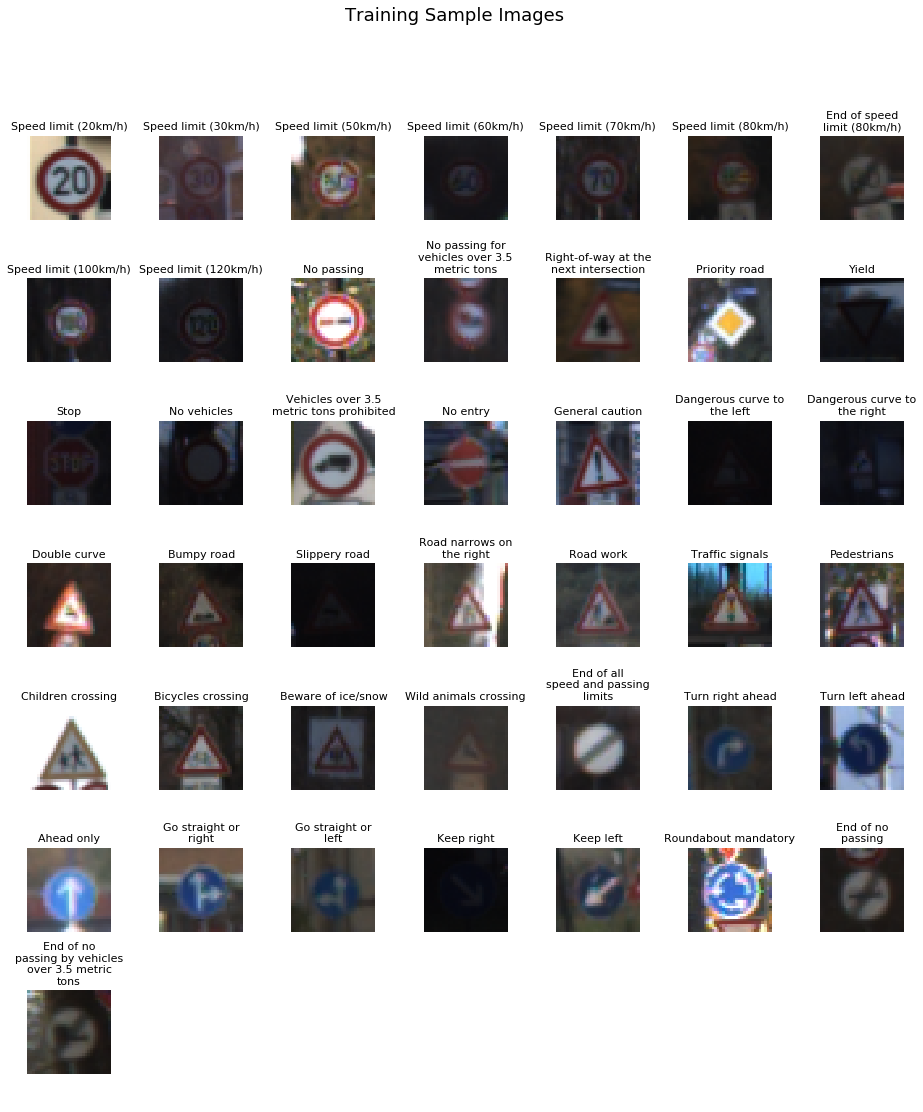

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axies = plt.subplots(nrows=7,ncols=7,figsize=(13,14))
fig.tight_layout()
fig.suptitle('Training Sample Images', fontsize=18, y=1.1)

for i in range(7):
    for j in range(7):
        if i*7 + j < n_classes:
            name_arr=signnames_dic[i*7+j].split()
            line_arr=[]
            for k in range(int(len(name_arr)/3)):
                two_words=' '.join(name_arr[3*k:3*(k+1)])
                line_arr.append(two_words)
            name='\n'.join(line_arr)
            if len(name_arr)%3==1:
                name+='\n'+name_arr[-1]
            elif len(name_arr)%3==2:
                name+='\n'+name_arr[-2]+' '+name_arr[-1]
                
            axies[i][j].set_title(name, fontdict={'fontsize':11})
            axies[i][j].set_axis_off()
            axies[i][j].imshow(train_img_dic[i*7+j])
        else:
            axies[i][j].axis('off')



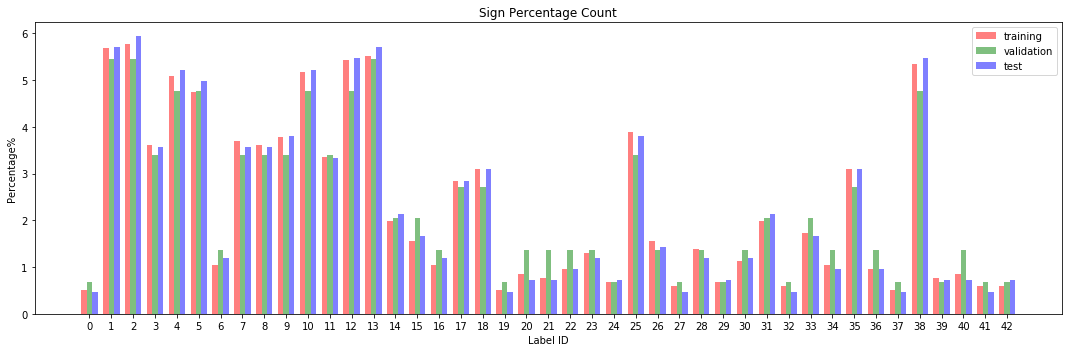

In [7]:
train_percentage=[]
valid_percentage=[]
test_percentage=[]
for i in range(n_classes):
    train_percentage.append(train_count_dic[i]*100.0)
    valid_percentage.append(valid_count_dic[i]*100.0)
    test_percentage.append(test_count_dic[i]*100.0)

fig, ax = plt.subplots()
index = np.arange(n_classes)
bar_width = 0.25
opacity = 0.5
 
rects1 = plt.bar(index, train_percentage, bar_width,
                 alpha=opacity,
                 color='r',
                 label='training')
 
rects2 = plt.bar(index + bar_width, valid_percentage, bar_width,
                 alpha=opacity,
                 color='g',
                 label='validation')
rects3 = plt.bar(index + 2*bar_width, test_percentage, bar_width,
                 alpha=opacity,
                 color='b',
                 label='test')

fig.set_size_inches(15, 5)
plt.xlabel('Label ID')
plt.ylabel('Percentage%')
plt.title('Sign Percentage Count')
plt.xticks(index+bar_width, range(n_classes))
plt.legend()
 
plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Referenced https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) 

With the LeNet-5 solution, I should expect a validation set accuracy of about 0.89. My final accuracy for validation set is 99.65% and test accuracy is 96.07%

### Pre-process the Data Set (normalization, grayscale, etc.)

For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data. In addition, one hot encoding is also applied to the labels.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np

def one_hot(labels):
    one_hot_labels=[]
    for label in labels:
        one_hot_label=np.zeros((n_classes))
        one_hot_label[label]=1
        one_hot_labels.append(one_hot_label)
    return np.array(one_hot_labels)

def preprocess(images,labels):
    new_images=0.333*images[:,:,:,0]+0.333*images[:,:,:,1]+0.333*images[:,:,:,2]
    new_images=(new_images-128)/128
    n,w,h=new_images.shape
    new_images=new_images.reshape((n,w,h,1))
    
    new_labels=one_hot(labels)
    
    return new_images,new_labels

In [9]:
from sklearn.utils import shuffle
p_X_train,p_y_train=preprocess(X_train,y_train)
p_X_train,p_y_train=shuffle(p_X_train,p_y_train)
p_X_valid,p_y_valid=preprocess(X_valid,y_valid)
p_X_valid,p_y_valid=shuffle(p_X_valid,p_y_valid)
p_X_test,p_y_test=preprocess(X_test,y_test)
p_X_test,p_y_test=shuffle(p_X_test,p_y_test)

### Model Architecture

In [18]:
import tensorflow as tf
def variables():
    x=tf.placeholder(tf.float32, shape=[None,32,32,1],name='x')
    y = tf.placeholder(tf.int32, [None,n_classes],name='y')
    lr=tf.placeholder(tf.float32,name='lr')
    dropout_rate=tf.placeholder(tf.float32,name='dp')
    return x,y,lr,dropout_rate

In [19]:
### Define my architecture here.
# referenced LeNet

def model(x,dropout_rate):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = 0.0, stddev = 0.1))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    relu1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x16. Output = 14x14x16.
    pool1 = tf.nn.max_pool(relu1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    drop1=tf.nn.dropout(pool1,dropout_rate)
    
    # Layer 2: Convolutional. Input = 14x14x16. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = 0.0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(drop1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    relu2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x32. Output = 5x5x32.
    pool2 = tf.nn.max_pool(relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    drop2=tf.nn.dropout(pool2,dropout_rate)

    # Flatten. Input = 5x5x32. Output = 800.
    flat=tf.reshape(drop2, (-1, 5*5*32))
    
    # Layer 3: Fully Connected. Input = 800. Output = 400
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = 0.0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(flat, fc1_W) + fc1_b
    relu3=tf.nn.relu(fc1)
    drop3=tf.nn.dropout(relu3,dropout_rate)
    
    # Layer 4: Fully Connected. Input = 400. Output = 200.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = 0.0, stddev = 0.1))
    fc2_b = tf.Variable(tf.zeros(200))
    fc2   = tf.matmul(drop3, fc2_W) + fc2_b
    relu4=tf.nn.relu(fc2)
    drop4=tf.nn.dropout(relu4,dropout_rate)
    
    # Layer 5: Fully Connected. Input = 200. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = 0.0, stddev = 0.1))
    fc3_b = tf.Variable(tf.zeros(43))
    out   = tf.matmul(drop4, fc3_W) + fc3_b
    
    return out

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
def model_loss(x,y,lr,dropout_rate):
    out=tf.identity(model(x,dropout_rate),name='out')
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out, labels=y))
    opt = tf.train.AdamOptimizer(lr).minimize(loss)
    
    corrects=tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))
    accuracy=tf.identity(tf.reduce_mean(tf.cast(corrects, tf.float32)),name='accuracy')
    
    return loss, opt, out, accuracy

In [21]:
epoch=10
batch_size=128
n_lr=0.001
n_dropout_rate=0.7

In [22]:
def evaluate(X_data,y_data,n):
    total_accuracy=0
    n_batch=int(n/batch_size)
    for offset in range(0, n, batch_size):
        acc = sess.run(accuracy, feed_dict={x:X_data[offset:offset+batch_size],y:y_data[offset:offset+batch_size], \
                                  dropout_rate:1.0})
        total_accuracy += acc
    return total_accuracy/n_batch

In [23]:
### Train my model here.
### Calculate and report the accuracy on the training and validation set.
x,y,lr,dropout_rate=variables()
loss,opt,out,accuracy=model_loss(x,y,lr,dropout_rate)
n_batch=int(n_train/batch_size)
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epoch):
        num=0
        for offset in range(0, n_train, batch_size):
            num+=1
            # Run optimizer
            _ = sess.run(opt, feed_dict={x: p_X_train[offset:offset+batch_size], y: p_y_train[offset:offset+batch_size], \
                                         lr:n_lr,dropout_rate:n_dropout_rate })
            
            if num%30==0:
                train_loss = loss.eval({x: p_X_train[offset:offset+batch_size], y: p_y_train[offset:offset+batch_size], \
                                        dropout_rate:1.0 })
    
                print("Epoch: {}/{}     ".format(e, epoch),
                      "Batch: {}/{}     ".format(num,n_batch),
                      "Train Loss: {:.4f}     ".format(train_loss))
        
        print("Epoch: {}/{}     ".format(e, epoch),
                      "Validation Accuracy: {:.4f}     ".format(evaluate(p_X_valid,p_y_valid,n_validation)))
        
    print("\nTest Accuracy: {:.4f}     ".format(evaluate(p_X_test,p_y_test,n_test))) 
    saver.save(sess, 'model')

Epoch: 0/10      Batch: 30/271      Train Loss: 3.5270     
Epoch: 0/10      Batch: 60/271      Train Loss: 3.3797     
Epoch: 0/10      Batch: 90/271      Train Loss: 2.8925     
Epoch: 0/10      Batch: 120/271      Train Loss: 2.4022     
Epoch: 0/10      Batch: 150/271      Train Loss: 1.7576     
Epoch: 0/10      Batch: 180/271      Train Loss: 1.3361     
Epoch: 0/10      Batch: 210/271      Train Loss: 1.0993     
Epoch: 0/10      Batch: 240/271      Train Loss: 0.8631     
Epoch: 0/10      Batch: 270/271      Train Loss: 0.7518     
Epoch: 0/10      Validation Accuracy: 0.7814     
Epoch: 1/10      Batch: 30/271      Train Loss: 0.5686     
Epoch: 1/10      Batch: 60/271      Train Loss: 0.5953     
Epoch: 1/10      Batch: 90/271      Train Loss: 0.5780     
Epoch: 1/10      Batch: 120/271      Train Loss: 0.4273     
Epoch: 1/10      Batch: 150/271      Train Loss: 0.3857     
Epoch: 1/10      Batch: 180/271      Train Loss: 0.4071     
Epoch: 1/10      Batch: 210/271      Trai

---

## Step 3: Test a Model on New Images

I Downloaded five pictures of German traffic signs from the web and use your model to predict the traffic sign type. As shown in the last section, the model accurately and confidently predicts the correct images.

### Load and Output the Images

In [5]:
### Load the images and plot them here.
import imageio
import numpy as np

test1=np.array(imageio.imread('../test/50km.jpg'))
test2=np.array(imageio.imread('../test/70km.jpg'))
test3=np.array(imageio.imread('../test/turn_right.jpg'))
test4=np.array(imageio.imread('../test/construction.jpg'))
test5=np.array(imageio.imread('../test/do_not_enter.jpg'))

test_img=np.stack((test1,test2,test3,test4,test5))
test_label=[2,4,33,25,17]

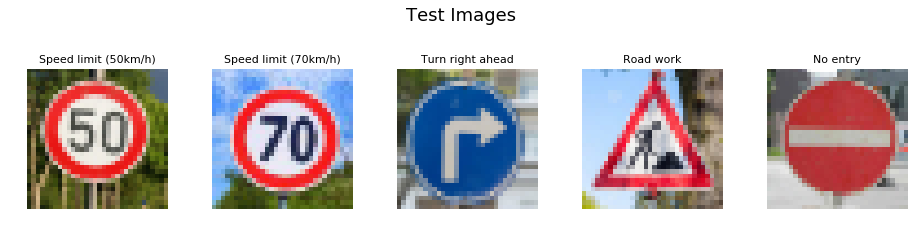

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axies = plt.subplots(ncols=5,figsize=(13,4))
fig.tight_layout()
fig.suptitle('Test Images', fontsize=18)
for i in range(5):
    name=signnames_dic[test_label[i]]

    axies[i].set_title(name, fontdict={'fontsize':11})
    axies[i].set_axis_off()
    axies[i].imshow(test_img[i])

### Predict the Sign Type for Each Image

In [11]:
p_test_img,p_test_label=preprocess(test_img,test_label)

In [12]:
import tensorflow as tf

In [13]:
### Run the predictions here and use the model to output the prediction for each image.

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph('model.meta')
    loader.restore(sess, 'model')
    
    loaded_x=tf.Graph.get_tensor_by_name(loaded_graph,name='x:0')
    loaded_dropout_rate=tf.Graph.get_tensor_by_name(loaded_graph,name='dp:0')
    loaded_out=tf.Graph.get_tensor_by_name(loaded_graph,name='out:0')

    result=sess.run(tf.nn.softmax(loaded_out), feed_dict={loaded_x: p_test_img,loaded_dropout_rate:1.0})

INFO:tensorflow:Restoring parameters from model


In [15]:
prediction=np.argmax(result,1)
print(prediction) # compare with test label

[ 2  4 33 25 17]


### Analyze Performance

In [16]:
accuracy=0.0
for i in range(5):
    if prediction[i]==test_label[i]:
        accuracy+=0.2
print('accuracy:{:.2f}'.format(accuracy))

accuracy:1.00


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, I will print out the model's softmax probabilities to show the **certainty** of the model's predictions (limiting the output to the top 5 probabilities for each image).

In [17]:
# referenced Udacity Deep Learning Nanodegree Project 2 helper.py
def display_top5(features, labels, predictions):
    n_classes = 43
    
    fig, axies = plt.subplots(nrows=5, ncols=2,figsize=(13,13))
    fig.tight_layout()
    fig.suptitle('Top 5 Predictions', fontsize=20, y=1.1)

    n_predictions = 5
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, labels, predictions.indices, predictions.values)):
        pred_names = [signnames_dic[pred_i] for pred_i in pred_indicies]
        correct_name = signnames_dic[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.1, 1.0])


TopKV2(values=array([[  9.69900787e-01,   2.43754778e-02,   2.27727881e-03,
          1.68984942e-03,   7.70062150e-04],
       [  9.99973416e-01,   2.65768795e-05,   4.82510654e-09,
          1.83944223e-12,   1.34798368e-13],
       [  1.00000000e+00,   6.09300277e-10,   1.10689138e-10,
          1.28172794e-11,   1.02776034e-11],
       [  1.00000000e+00,   9.58227986e-09,   8.51334647e-09,
          4.65671501e-09,   1.53412849e-09],
       [  1.00000000e+00,   3.84560384e-09,   1.47648439e-11,
          2.92688291e-12,   1.72785755e-12]], dtype=float32), indices=array([[ 2,  1, 31,  0,  5],
       [ 4,  0,  1, 40, 37],
       [33, 37, 35, 39, 11],
       [25, 21, 29, 31, 22],
       [17, 14, 33, 38, 32]], dtype=int32))


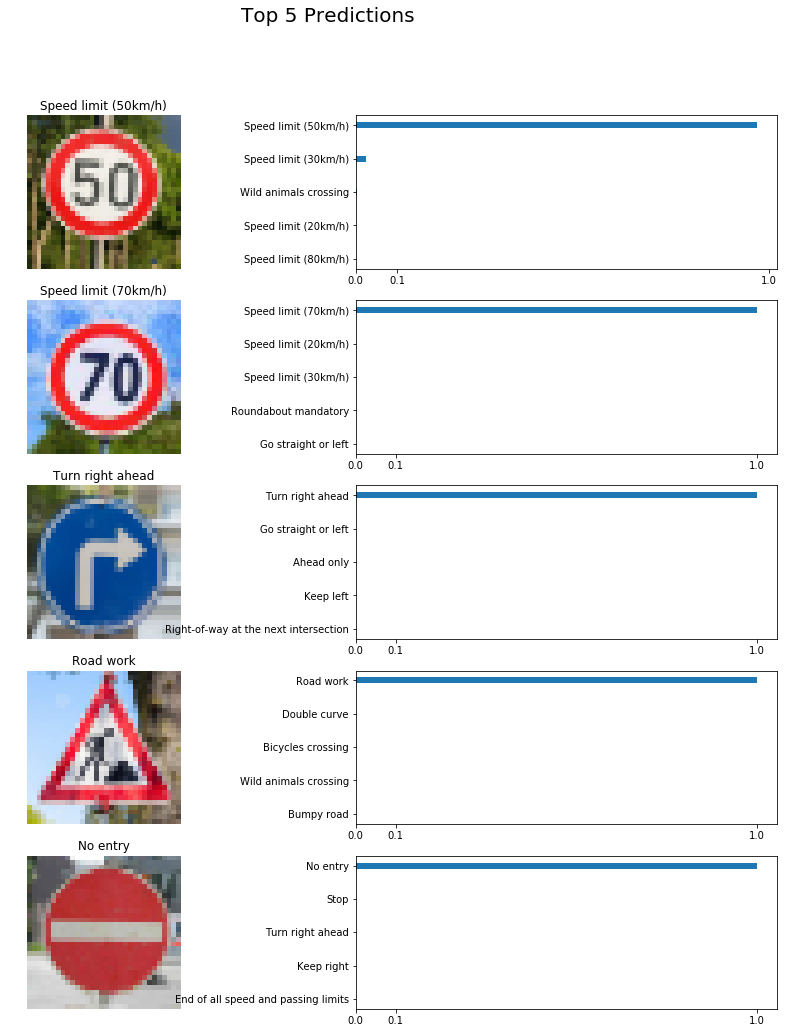

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    top5=sess.run(tf.nn.top_k(tf.constant(result), k=5))
    print(top5)
    display_top5(test_img, test_label, top5)
    